In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
book_df=pd.read_csv("bestsellers_with_categories.csv")

In [3]:
book_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
book_df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
book_df.Author.nunique()

248

In [7]:
book_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
author_count=book_df.Author.value_counts().reset_index()
author_count.columns=["Author","count"]
author_count_5=author_count.head(5)
author_count_5

,Author,count
0,Jeff Kinney,12
1,Gary Chapman,11
2,Rick Riordan,11
3,Suzanne Collins,11
4,American Psychological Association,10


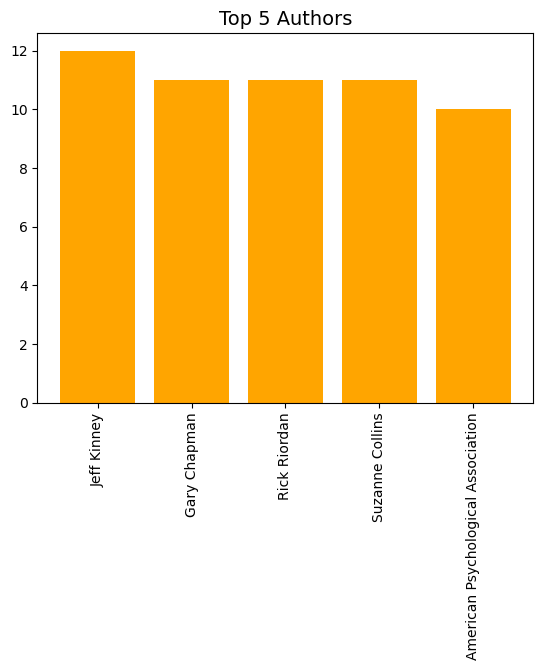

In [9]:
plt.bar(author_count_5["Author"],author_count_5["count"],color="orange")
plt.title("Top 5 Authors",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [10]:
genre_count=book_df.Genre.value_counts().reset_index()
genre_count.columns=["Genre","count"]
genre_count

,Genre,count
0,Non Fiction,310
1,Fiction,240


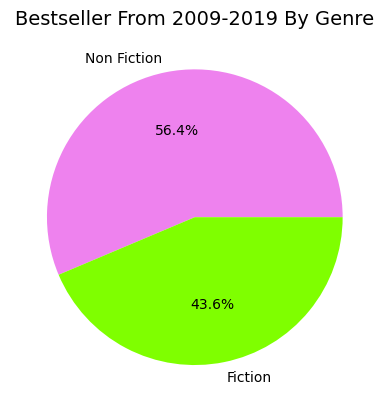

In [11]:
plt.pie(genre_count["count"],labels=genre_count["Genre"],colors=["violet","Chartreuse"],autopct="%1.1f%%")
plt.title("Bestseller From 2009-2019 By Genre",fontsize=14)
plt.show()

In [12]:
book_df_genre_review=book_df.groupby("Genre")["Reviews"].mean().reset_index()
book_df_genre_review

,Genre,Reviews
0,Fiction,15683.791667
1,Non Fiction,9065.145161


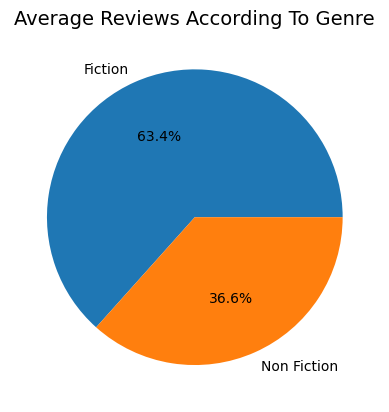

In [13]:
plt.pie(book_df_genre_review["Reviews"],labels=book_df_genre_review["Genre"],autopct="%1.1f%%")
plt.title("Average Reviews According To Genre",fontsize=14)
plt.show()

In [14]:
autor_rating=book_df.groupby("Author")["User Rating"].mean().reset_index()
autor_rating_sort=autor_rating.sort_values("User Rating",ascending=False)
autor_rating_5=autor_rating_sort.head(5)
author_rating_5_sort=autor_rating_5.reset_index(drop=True)
author_rating_5_sort

,Author,User Rating
0,Patrick Thorpe,4.9
1,Lin-Manuel Miranda,4.9
2,Chip Gaines,4.9
3,Sherri Duskey Rinker,4.9
4,Nathan W. Pyle,4.9


In [15]:
author_review=book_df.groupby("Author")["Reviews"].mean().reset_index()
author_review_sort=author_review.sort_values("Reviews",ascending=False)
author_review_5=author_review_sort.head(5)
author_review_5_sort=author_review_5.reset_index(drop=True)
author_review_5_sort

,Author,Reviews
0,Delia Owens,87841.0
1,Paula Hawkins,79446.0
2,Michelle Obama,61133.0
3,Gillian Flynn,57271.0
4,Kristin Hannah,49288.0


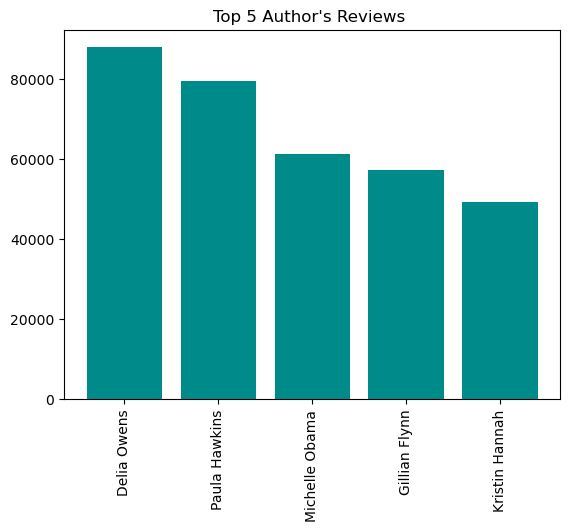

In [16]:
plt.bar(author_review_5_sort["Author"],author_review_5_sort["Reviews"],color="darkcyan")
plt.title("Top 5 Author's Reviews ")
plt.xticks(rotation=90)
plt.show()

In [17]:
author_price=book_df.groupby("Author")["Price"].mean().reset_index()
author_price_sort=author_price.sort_values("Price",ascending=False)
author_price_5=author_price_sort.head(5)
author_price_5_sort=author_price_5.reset_index(drop=True)
author_price_5_sort

,Author,Price
0,American Psychiatric Association,105.0
1,Lin-Manuel Miranda,54.0
2,Bill Simmons,53.0
3,American Psychological Association,46.0
4,Alan Moore,42.0


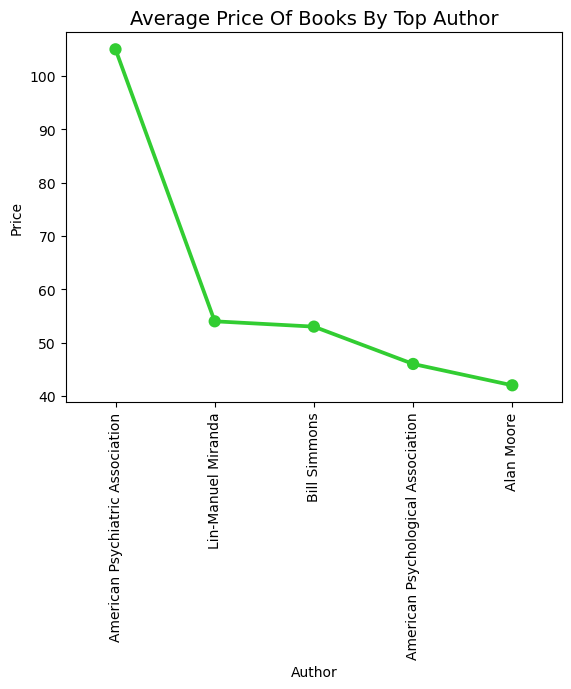

In [18]:
sns.pointplot(author_price_5_sort["Author"],author_price_5_sort["Price"],color="limegreen")
plt.title("Average Price Of Books By Top Author",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [19]:
genre_price=book_df.groupby("Genre")["Price"].mean().reset_index()
genre_price_sort=genre_price.sort_values("Price",ascending=False).reset_index()
genre_price_sort

,index,Genre,Price
0,1,Non Fiction,14.841935
1,0,Fiction,10.850000


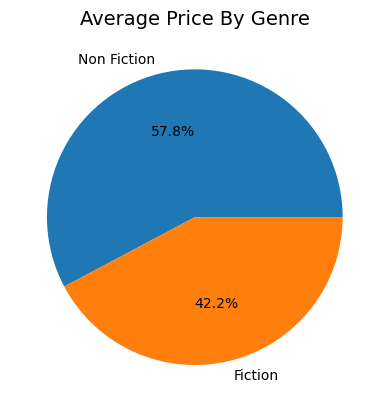

In [20]:
plt.pie(genre_price_sort["Price"],labels=genre_price_sort["Genre"],autopct="%1.1f%%")
plt.title("Average Price By Genre",fontsize=14)
plt.show()

In [21]:
book_fic=book_df[book_df["Genre"]=="Fiction"].reset_index(drop=True)
book_fic

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
1,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
2,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
3,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
4,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
...,...,...,...,...,...,...,...
235,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
236,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
237,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
238,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


In [22]:
book_fic_author=book_fic["Author"].value_counts().reset_index()
book_fic_author.columns=["Author","count"]
book_fic_author_5=book_fic_author.head(5)
book_fic_author_5

,Author,count
0,Jeff Kinney,12
1,Suzanne Collins,11
2,Rick Riordan,11
3,Dr. Seuss,9
4,Stephenie Meyer,7


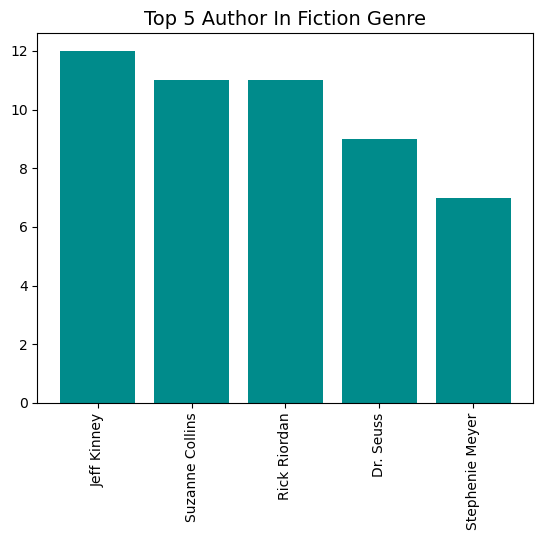

In [23]:
plt.bar(book_fic_author_5["Author"],book_fic_author_5["count"],color="darkcyan")
plt.title("Top 5 Author In Fiction Genre",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [24]:
year_price_fic=book_fic.groupby("Year")["Price"].mean().reset_index()
year_price_fic_sort=year_price_fic.sort_values("Year",ascending=False)
year_price_fic_sort=year_price_fic_sort.reset_index(drop=True)
year_price_fic_sort

,Year,Price
0,2019,9.350000
1,2018,8.761905
2,2017,8.833333
3,2016,12.631579
4,2015,9.352941
5,2014,10.172414
6,2013,10.708333
7,2012,12.285714
8,2011,11.619048
9,2010,9.700000


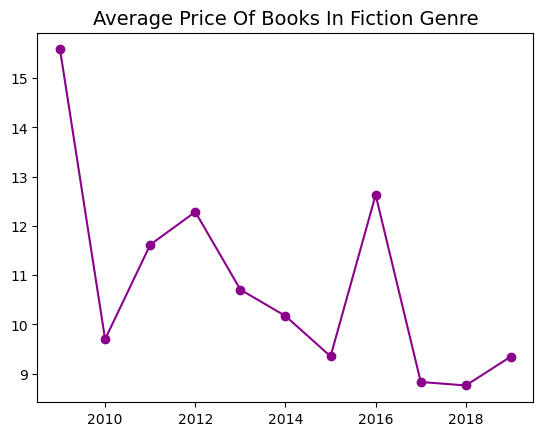

In [25]:
plt.plot(year_price_fic_sort["Year"],year_price_fic_sort["Price"],marker="o",c="darkmagenta")
plt.title("Average Price Of Books In Fiction Genre",fontsize=14)
plt.show()

In [26]:
book_fic_author_review=book_fic.groupby("Author")["Reviews"].mean().reset_index()
book_fic_author_review_sort=book_fic_author_review.sort_values("Reviews",ascending=False)
book_fic_author_review_5=book_fic_author_review_sort.head(5)
book_fic_author_review_5_sort=book_fic_author_review_5.reset_index(drop=True)
book_fic_author_review_5_sort

,Author,Reviews
0,Delia Owens,87841.0
1,Paula Hawkins,79446.0
2,Gillian Flynn,57271.0
3,Kristin Hannah,49288.0
4,John Green,42083.8


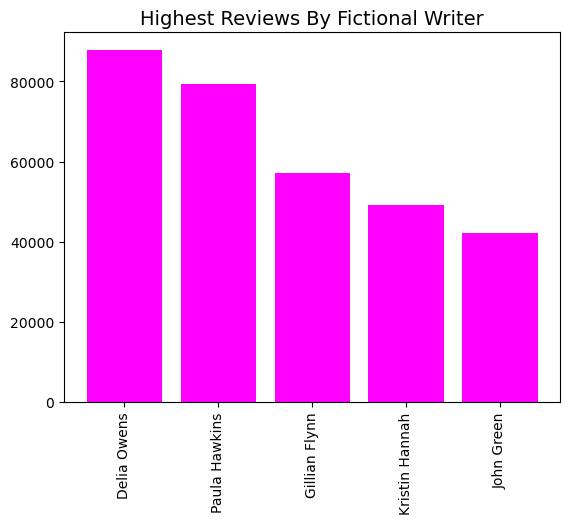

In [27]:
plt.bar(book_fic_author_review_5_sort["Author"],book_fic_author_review_5_sort["Reviews"],color="fuchsia")
plt.title("Highest Reviews By Fictional Writer",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [28]:
book_non_fic=book_df[book_df.Genre=="Non Fiction"].reset_index(drop=True)
book_non_fic

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
2,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
3,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
4,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
...,...,...,...,...,...,...,...
305,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
306,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
307,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
308,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [29]:
book_non_fic_author=book_non_fic["Author"].value_counts().reset_index()
book_non_fic_author.columns=["Author","count"]
book_non_fic_author_5=book_non_fic_author.head(5)
book_non_fic_author_5

,Author,count
0,Gary Chapman,11
1,American Psychological Association,10
2,Gallup,9
3,Rob Elliott,8
4,Bill O'Reilly,7


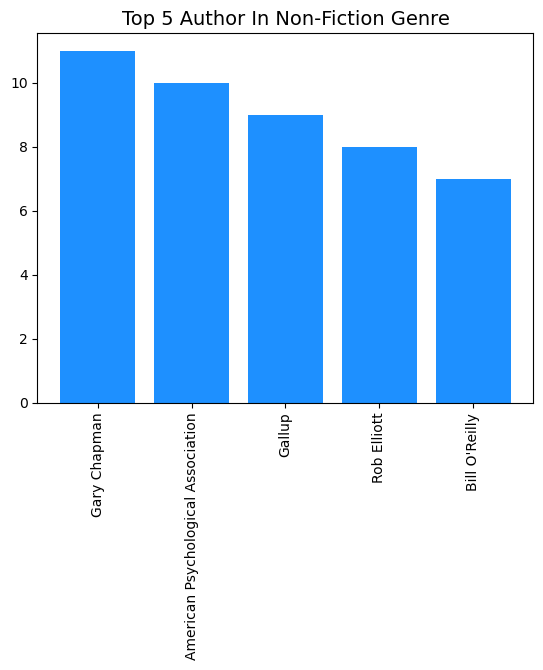

In [30]:
plt.bar(book_non_fic_author_5["Author"],book_non_fic_author_5["count"],color="dodgerblue")
plt.title("Top 5 Author In Non-Fiction Genre",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [31]:
year_price_non_fic=book_non_fic.groupby("Year")["Price"].mean().reset_index()
year_price_non_fic_sort=year_price_non_fic.sort_values("Year",ascending=False)
year_price_non_fic_sort=year_price_non_fic_sort.reset_index(drop=True)
year_price_non_fic_sort

,Year,Price
0,2019,10.566667
1,2018,11.793103
2,2017,13.730769
3,2016,13.516129
4,2015,10.969697
5,2014,20.809524
6,2013,18.192308
7,2012,17.482759
8,2011,17.620690
9,2010,16.000000


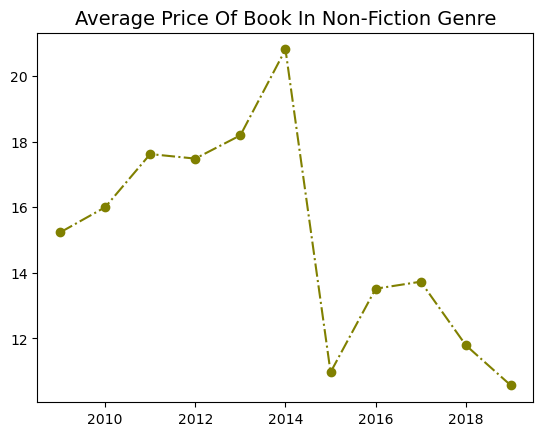

In [32]:
plt.plot(year_price_non_fic_sort["Year"],year_price_non_fic_sort["Price"],"-.",marker="o",c="olive")
plt.title("Average Price Of Book In Non-Fiction Genre",fontsize=14)
plt.show()

In [33]:
book_non_fic_author_review=book_non_fic.groupby("Author")["Reviews"].mean().reset_index()
book_non_fic_author_review_sort=book_non_fic_author_review.sort_values("Reviews",ascending=False)
book_non_fic_author_review_5=book_non_fic_author_review_sort.head(5)
book_non_fic_author_review_5_sort=book_non_fic_author_review_5.reset_index(drop=True)
book_non_fic_author_review_5_sort

,Author,Reviews
0,Michelle Obama,61133.0
1,Laura Hillenbrand,29673.0
2,Tara Westover,28729.0
3,Mark Manson,26490.0
4,Dale Carnegie,25001.0


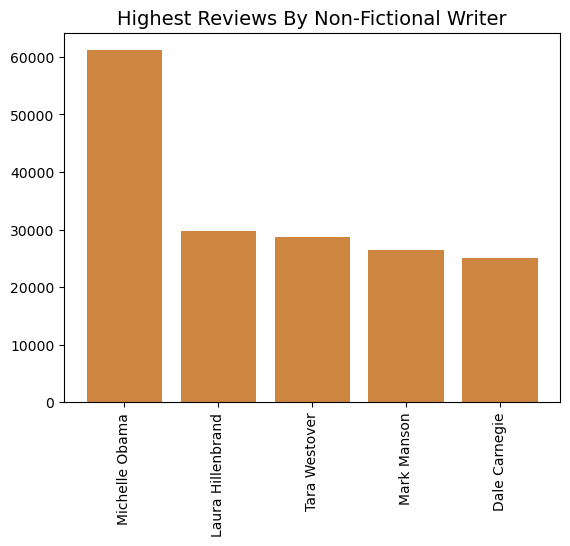

In [34]:
plt.bar(book_non_fic_author_review_5_sort["Author"],book_non_fic_author_review_5_sort["Reviews"],color="peru")
plt.title("Highest Reviews By Non-Fictional Writer",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [35]:
year_genre_fic=book_fic["Year"].value_counts().reset_index()
year_genre_fic.columns=["year","count"]
year_genre_fic_sort=year_genre_fic.sort_values("year",ascending=True)
year_genre_fic_sort

,year,count
3,2009,24
8,2010,20
4,2011,21
6,2012,21
2,2013,24
0,2014,29
10,2015,17
9,2016,19
1,2017,24
5,2018,21


In [36]:
year_genre_non_fic=book_non_fic["Year"].value_counts().reset_index()
year_genre_non_fic.columns=["year","count"]
year_genre_non_fic_sort=year_genre_non_fic.sort_values("year",ascending=True)
year_genre_non_fic_sort

,year,count
7,2009,26
3,2010,30
5,2011,29
6,2012,29
9,2013,26
10,2014,21
0,2015,33
1,2016,31
8,2017,26
4,2018,29


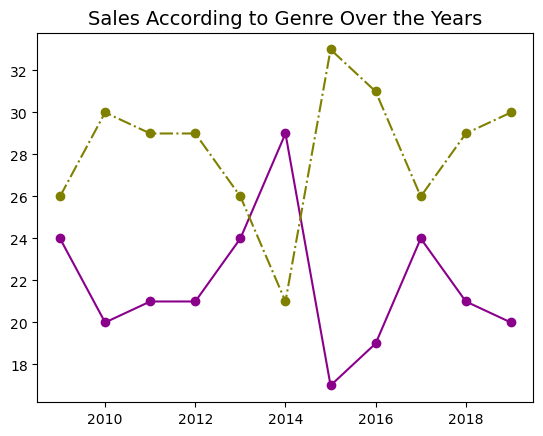

In [37]:
plt.plot(year_genre_fic_sort["year"],year_genre_fic_sort["count"],label="Fiction",marker="o",color="darkmagenta")
plt.plot(year_genre_non_fic_sort["year"],year_genre_non_fic_sort["count"],"-.",label="Non Fiction",marker="o",color="olive")
plt.title("Sales According to Genre Over the Years",fontsize=14)
plt.show()

In [38]:
fic_choice=book_fic.groupby("Year")["Genre"].count().reset_index()

In [39]:
fic_choice

,Year,Genre
0,2009,24
1,2010,20
2,2011,21
3,2012,21
4,2013,24
5,2014,29
6,2015,17
7,2016,19
8,2017,24
9,2018,21


In [40]:
non_fic_choice=book_non_fic.groupby("Year")["Genre"].count().reset_index()

In [41]:
non_fic_choice

,Year,Genre
0,2009,26
1,2010,30
2,2011,29
3,2012,29
4,2013,26
5,2014,21
6,2015,33
7,2016,31
8,2017,26
9,2018,29


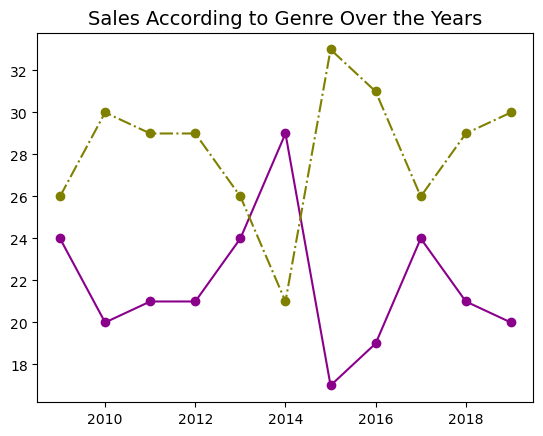

In [42]:
plt.plot(fic_choice["Year"],fic_choice["Genre"],label="Fiction",marker="o",color="darkmagenta")
plt.plot(non_fic_choice["Year"],non_fic_choice["Genre"],"-.",label="Non Fiction",marker="o",color="olive")
plt.title("Sales According to Genre Over the Years",fontsize=14)
plt.show()